> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

## Introduction
I selected the TMDb movie dataset from kaggle to investigate.the data contains information that are provided from The Movie Database (TMDb). It collects 5000+ movies and their rating and basic move information, including user ratings and revenue data.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
sns.set_style("whitegrid")



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

Look like what is dataset like

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_1 = pd.read_csv('tmdb_5000_credits.csv')
df_2 = pd.read_csv('tmdb_5000_movies.csv')

df_1.head()
df_2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Some information about dataset

In [3]:
print('Data_1 shape',df_1.shape)
print('Data_2 shape',df_2.shape)

Data_1 shape (4803, 4)
Data_2 shape (4803, 20)


In [4]:
df_2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
df_2.nunique()


budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


Remove the columns that we will not use on Data Analysis

In [8]:
df_2.drop(labels=['id','homepage', 'keywords', 'original_language','production_countries','production_companies','original_title', 'tagline', 'overview', 'spoken_languages', 'status'],axis=1 ,inplace=True)


Dealing with columns that have missing data

In [9]:
df_2.fillna(df_2.mean(), inplace=True)

In [10]:
df_2.dropna(inplace=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4802 non-null   int64  
 1   genres        4802 non-null   object 
 2   popularity    4802 non-null   float64
 3   release_date  4802 non-null   object 
 4   revenue       4802 non-null   int64  
 5   runtime       4802 non-null   float64
 6   title         4802 non-null   object 
 7   vote_average  4802 non-null   float64
 8   vote_count    4802 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 375.2+ KB


Remove Movies that have no budget and revenue

In [11]:
df_2 = df_2[(df_2['budget'] != 0) & (df_2['revenue'] != 0)]

In [12]:
df_2.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124


Make a new column for profit

In [13]:
df_2['profit'] = df_2.revenue - df_2.budget

In [14]:
df_2.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,24139100


Convert data type of columns to integer 

In [15]:
df_2['release_date'] = pd.to_datetime(df_2['release_date'])
df_2['budget'] = df_2['budget'].astype(int)
df_2['revenue'] = df_2['revenue'].astype(int)
df_2['profit'] = df_2['profit'].astype(int)
df_2['popularity'] = df_2['popularity'].astype(int)
df_2.info()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   budget        3229 non-null   int32         
 1   genres        3229 non-null   object        
 2   popularity    3229 non-null   int32         
 3   release_date  3229 non-null   datetime64[ns]
 4   revenue       3229 non-null   int32         
 5   runtime       3229 non-null   float64       
 6   title         3229 non-null   object        
 7   vote_average  3229 non-null   float64       
 8   vote_count    3229 non-null   int64         
 9   profit        3229 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(2)
memory usage: 227.0+ KB


,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150,2009-12-10,-1507002209,162.0,Avatar,7.2,11800,-1744002209
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107,2015-10-26,880674609,148.0,Spectre,6.3,4466,635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43,2012-03-07,284139100,132.0,John Carter,6.1,2124,24139100


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [16]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [17]:
df_2.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150,2009-12-10,-1507002209,162.0,Avatar,7.2,11800,-1744002209
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107,2015-10-26,880674609,148.0,Spectre,6.3,4466,635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43,2012-03-07,284139100,132.0,John Carter,6.1,2124,24139100


#### One of the first questions asked to analyze the data is there a relationship between release date and popularity

In [18]:
y_p = df_2.groupby('release_date').mean()['popularity']
y_p.head()

release_date
1916-09-04     3.0
1925-11-05     0.0
1927-01-10    32.0
1929-02-08     0.0
1930-11-15     8.0
Name: popularity, dtype: float64

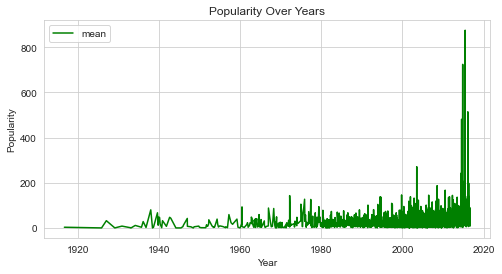

In [20]:
index_y_p = y_p.index 
def plot_fun(x,y,z,p,t):
    sns.set_style('whitegrid')
    #set x, y axis data
    #x1, y1 for mean data; x2, y2 for median data
    x1, y1 = x, y
    #set size
    plt.figure(figsize=(8, 4))
    #plot line chart for mean and median
    plt.plot(x1, y1, color = 'g', label = 'mean')
    #set title and labels
    plt.title('Popularity Over Years')
    plt.xlabel('Year')
    plt.ylabel('Popularity');
    #set legend
    plt.legend(loc='upper left')
plot_fun(index_y_p,y_p,'Popularity Over Years','Year','Popularity')

From this analysis, we find that the popularity of films increases year after year

#### the Second one is is there relation between release data and profit

In [22]:
y_r = df_2.groupby('release_date').mean()['profit']
y_r.head()

release_date
1916-09-04     8008844.0
1925-11-05    21755000.0
1927-01-10   -91969578.0
1929-02-08     3979000.0
1930-11-15     4050000.0
Name: profit, dtype: float64

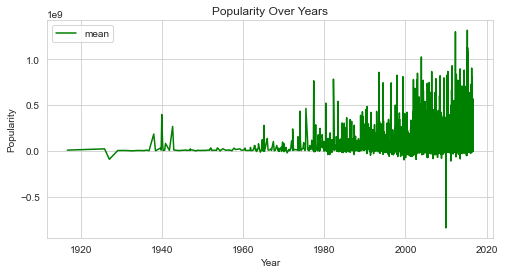

In [23]:
index_y_r = y_r.index
plot_fun(index_y_r,y_r,'Profit Over Years','Year','Profit')


From this analysis, we find that the profit of films increases year after year

In [ ]:
df_2.hist(figsize=(10,10));

#### From here, we will observe our variables of interest till now. :

    1-Most movies lie in the budget range 0 to 0.5 on a e to the power 8 scale
    2-Most movies have popularity between 0 to 100
    3-Many movies have negative profit values which suggests loss making movies
    4-Most movies have revenue collection in the range 0 to 0.25 but on a e to the power of 9 scale
    5-Most movies have runtime in the range of 75 to 150


In [ ]:
df_2.corr()

In [ ]:
pd.plotting.scatter_matrix(df_2, figsize = (15,15));


#### Among these scatterplots we will observe our relations of interest:

    Profit vs Popularity shows positive but low correlation.
    Profit vs Revenue shows the highest positive correlation.
    Profit vs Runtime show positive but very low correlation.
    

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!


##### There are several feature that affect and don't affect the profit that the movie made, such as:

    1-It is not true that the higher the budget of the movie, the more profit it will make.
    2-The year the movie is made. The movie released on 1970 to 1980 seems to raised more money. This might be a thing to consider when cinema decides to open an old movie session.
    3-There seems to be a seasonal pattern in terms of the profit. Movie released during second and fourth quarters tend to gain more profit.
    4-It seems that popularity does not affect the profit much. However, it seems like the vote does affect the profit.
    5-Most popular movie duration is less than 200 minutes. In fact, it is also the duration where movie made more money.
    6-Drama is the most popular genre, following by action, comedy and thriller.
    7-Drame, Comedy, Thriller and Action are four most-made genres.
    8-Maximum Number Of Movies Release In year 2014.
    9-Short or Long duration movies are more popular than long duration movies.
    10-Average runtime of the movies are decreasing year by year.
    11-Revenue is directly connected to the budget.
    

### Limitations

    1-It's not 100 percent guaranteed solution that this formula is gonna work, But it shows us that we have high probability of making high profits if we had similar characteristics as such. If we release a movie with these characteristics, it gives people high expectations from this movie. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of.
  